

# **DeepFace - Age, Gender, Expression, Headpose and Recognition**

---


In this below project, we use the **DeepFace API for Age, Gender, Expression Facial and Recognition. We even use the headpose library to obtain head direction/tilt**. DeepFace is an easy to use python module that provides access to several Facial Detection and Recognition models. It's very simple to use to let's dive in.

1. Installation of the necessary modules
2. Demonstrate facial landmarks
3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace
4. Perform Facial Similarity
5. Perform Facial Recognition





## **1. Install the necessary modules**

In [ ]:
!pip install deepface
!pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=67fd8a899279b5184a061fa118c8c3e85bf6739f73eacc16db0c72f6480dc935
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


#### **Define our imshow function**

In [ ]:
# Some imports and our image viewing function
import dlib
import tarfile
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [ ]:
# Download our test images and a test pic
!gdown --id 1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
!unzip -q face_recognition.zip


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
To: /content/face_recognition.zip
100% 4.84M/4.84M [00:00<00:00, 36.2MB/s]


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## **2. Demonstrate facial landmarks**

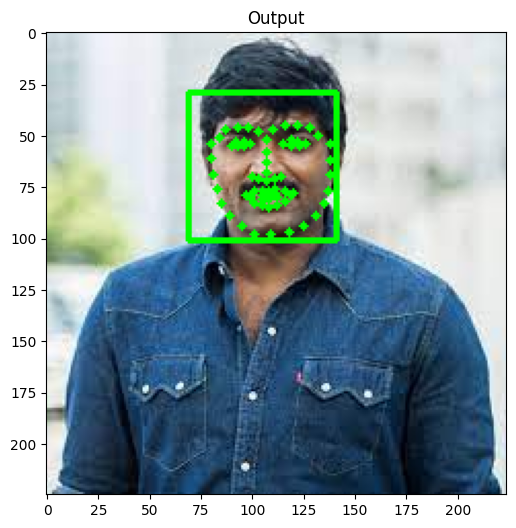

In [ ]:
from imutils import face_utils

p = "/content/gdrive/My Drive/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

image = cv2.imread("/content/gdrive/My Drive/test1.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get faces
rects = detector(gray, 0)

# For each detected face, find the landmark.
for (i, rect) in enumerate(rects):
    # Make the prediction and transfom it to numpy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Draw on our image, all the finded cordinate points (x,y)
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Show the image
imshow("Output", image)

## **3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace**

**Download our models**

In [ ]:
!gdown --id 1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
!gdown --id 1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
!gdown --id 1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
!gdown --id 1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI

!mv facial_expression_model_weights.zip /root/.deepface/weights/facial_expression_model_weights.zip
!mv age_model_weights.h5 /root/.deepface/weights/age_model_weights.h5
!mv gender_model_weights.h5 /root/.deepface/weights/gender_model_weights.h5
!mv race_model_single_batch.zip /root/.deepface/weights/race_model_single_batch.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
To: /content/facial_expression_model_weights.zip
100% 5.54M/5.54M [00:00<00:00, 19.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
From (redirected): https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI&confirm=t&uuid=48aa8de9-41fc-49ec-9052-9c15ea1ee561
To: /content/age_model_weights.h5
100% 539M/539M [00:13<00:00, 41.2MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning

In [ ]:
!pip install deepface

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

24-05-08 15:44:46 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  0%|          | 1.57M/539M [00:00<00:36, 14.8MB/s]
  1%|          | 5.77M/539M [00:00<00:18, 28.8MB/s]
  3%|▎         | 13.6M/539M [00:00<00:10, 49.9MB/s]
  6%|▌         | 29.9M/539M [00:00<00:05, 92.5MB/s]
 11%|█         | 60.3M/539M [00:00<00:02, 166MB/s] 
 18%|█▊        | 97.0M/539M [00:00<00:01, 232MB/s]
 22%|██▏       | 121M/539M [00:00<00:01, 226MB/s] 
 27%|██▋       | 148M/539M [00:00<00:01, 240MB/s]
 32%|███▏      | 172M/539M [00:00<00:01, 225MB/s]
 36%|███▋      | 196M/539M [00:01<00:01, 201MB/s]
 40%|████      | 217M/539M [00:01<00:01, 198MB/s]
 44%|████▍     | 238M/539M [00:01<00:01, 200MB/s]
 48%|████▊     | 258M/539M [00:01<00:01, 198MB/s]
 52%|█████▏    | 278M/539M [00:01<00:01, 199MB/s]
 55%|█████▌    | 299M/539M [00:01<00:01, 199MB/s]
 62%|██████▏   | 332M/539M [00:01<00

24-05-08 15:45:08 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  0%|          | 1.57M/537M [00:00<00:39, 13.6MB/s]
  1%|          | 4.72M/537M [00:00<00:24, 22.0MB/s]
  2%|▏         | 10.5M/537M [00:00<00:14, 36.2MB/s]
  4%|▍         | 21.0M/537M [00:00<00:08, 61.4MB/s]
  7%|▋         | 39.8M/537M [00:00<00:04, 105MB/s] 
 12%|█▏        | 66.6M/537M [00:00<00:02, 158MB/s]
 18%|█▊        | 95.9M/537M [00:00<00:02, 201MB/s]
 23%|██▎       | 124M/537M [00:00<00:01, 227MB/s] 
 28%|██▊       | 150M/537M [00:00<00:01, 234MB/s]
 33%|███▎      | 179M/537M [00:01<00:01, 252MB/s]
 39%|███▉      | 209M/537M [00:01<00:01, 263MB/s]
 44%|████▍     | 238M/537M [00:01<00:01, 270MB/s]
 49%|████▉     | 265M/537M [00:01<00:01, 266MB/s]
 55%|█████▍    | 294M/537M [00:01<00:00, 271MB/s]
 60%|██████    | 323M/537M [00:01<00:00, 279MB/s]
 65%|██████▌   | 352M/537M [0

24-05-08 15:45:14 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  0%|          | 1.05M/537M [00:00<00:59, 9.05MB/s]
  1%|          | 3.15M/537M [00:00<00:36, 14.8MB/s]
  1%|▏         | 6.82M/537M [00:00<00:22, 23.4MB/s]
  2%|▏         | 13.1M/537M [00:00<00:13, 37.6MB/s]
  4%|▍         | 23.6M/537M [00:00<00:08, 60.7MB/s]
  8%|▊         | 40.4M/537M [00:00<00:05, 95.3MB/s]
 13%|█▎        | 67.6M/537M [00:00<00:03, 152MB/s] 
 19%|█▊        | 99.6M/537M [00:00<00:02, 203MB/s]
 22%|██▏       | 121M/537M [00:00<00:02, 194MB/s] 
 26%|██▌       | 141M/537M [00:01<00:02, 183MB/s]
 30%|██▉       | 159M/537M [00:01<00:02, 181MB/s]
 33%|███▎      | 180M/537M [00:01<00:01, 187MB/s]
 37%|███▋      | 201M/537M [00:01<00:01, 193MB/s]
 41%|████▏     | 222M/537M [00:01<00:01, 196MB/s]
 45%|████▌     | 243M/537M [00:01<00:01, 199MB/s]
 49%|████▉     | 263

24-05-08 15:45:21 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

  0%|          | 0.00/5.98M [00:00<?, ?B/s]
 26%|██▋       | 1.57M/5.98M [00:00<00:00, 13.8MB/s]
100%|██████████| 5.98M/5.98M [00:00<00:00, 23.6MB/s]
Action: emotion: 100%|██████████| 4/4 [00:38<00:00,  9.54s/it]


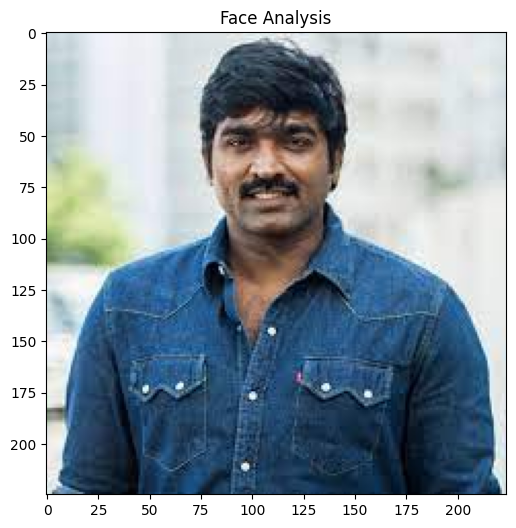

[   {   'age': 29,
        'dominant_emotion': 'happy',
        'dominant_gender': 'Man',
        'dominant_race': 'indian',
        'emotion': {   'angry': 1.255320627876595,
                       'disgust': 2.5255777371467277e-06,
                       'fear': 0.01583568416719099,
                       'happy': 92.663072665104,
                       'neutral': 5.160465706642355,
                       'sad': 0.8790138294117248,
                       'surprise': 0.026292656772267137},
        'face_confidence': 0.89,
        'gender': {'Man': 99.99750852584839, 'Woman': 0.0024970591766759753},
        'race': {   'asian': 0.008525057418135622,
                    'black': 0.15671570788119482,
                    'indian': 97.87198292446034,
                    'latino hispanic': 1.7665055702033978,
                    'middle eastern': 0.10899113907984728,
                    'white': 0.08727927281136946},
        'region': {   'h': 71,
                      'left_eye': None,
   

In [ ]:
from deepface import DeepFace
import pprint

img_path = "/content/gdrive/My Drive/test1.jpeg"
image = cv2.imread(img_path)

obj = DeepFace.analyze(img_path = img_path,
                       actions = ['age', 'gender', 'race', 'emotion'])
imshow("Face Analysis", image)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

## **4. Perform Facial Similarity**

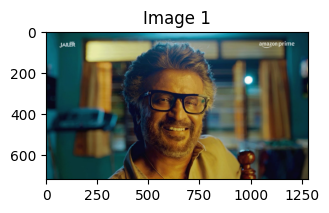

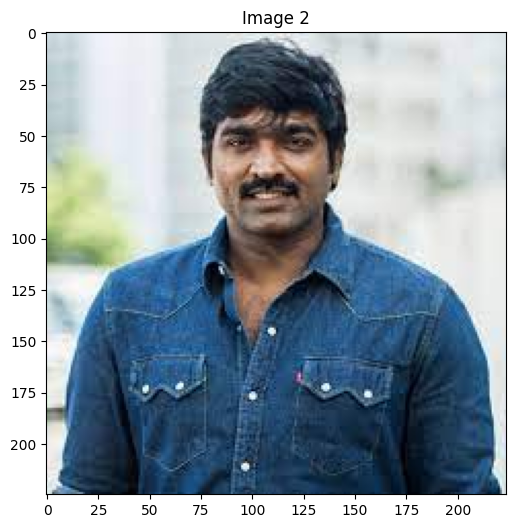

Is verified:  False


{'verified': False,
 'distance': 0.7434246081509447,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 71,
   'y': 27,
   'w': 71,
   'h': 71,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 452,
   'y': 193,
   'w': 374,
   'h': 374,
   'left_eye': None,
   'right_eye': None}},
 'time': 35.25}

In [ ]:
result  = DeepFace.verify("/content/gdrive/My Drive/test1.jpeg", "/content/gdrive/My Drive/test2.jpg")
path="/content/gdrive/My Drive/test1.jpeg"
img=cv2.imread(path)
img_path = "/content/gdrive/My Drive/test2.jpg"
image = cv2.imread(img_path)
imshow("Image 1",image)
imshow("Image 2",img)
print("Is verified: ", result["verified"])
result

### **We can even use different Distance Metrics**

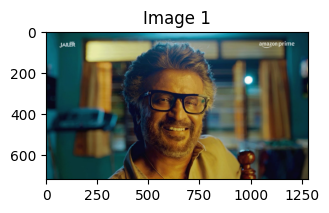

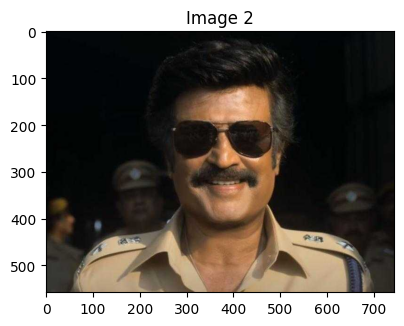

Is verified:  True


{'verified': True,
 'distance': 1.0382587881171867,
 'threshold': 1.17,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean',
 'facial_areas': {'img1': {'x': 452,
   'y': 193,
   'w': 374,
   'h': 374,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 228,
   'y': 111,
   'w': 309,
   'h': 309,
   'left_eye': None,
   'right_eye': None}},
 'time': 0.79}

In [ ]:
#metrics = ["cosine", "euclidean", "euclidean_l2"]

result  = DeepFace.verify("/content/gdrive/My Drive/test2.jpg", "/content/gdrive/My Drive/rajni.jpg", distance_metric = 'euclidean')
path="/content/gdrive/My Drive/test2.jpg"
img=cv2.imread(path)
path_n="/content/gdrive/My Drive/rajni.jpg"
img_n=cv2.imread(path_n)
imshow("Image 1",img)
imshow("Image 2",img_n)
print("Is verified: ", result["verified"])
result

### **Download models as the existing DeepFace downloader has stopped working**

In [ ]:
!gdown --id 1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1
!gdown --id 1GWIuvW3Vm3wMpGGEyTT7sU-c1cVWZIEc
!mv vgg_face_weights.h5 /root/.deepface/weights/vgg_face_weights.h5
!mv facenet_weights.h5 /root/.deepface/weights/facenet_weights.h5

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1
From (redirected): https://drive.google.com/uc?id=1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1&confirm=t&uuid=0013706f-9e3b-4c58-b655-ebbb33c40245
To: /content/vgg_face_weights.h5
100% 580M/580M [00:14<00:00, 38.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GWIuvW3Vm3wMpGGEyTT7sU-c1cVWZIEc
To: /content/facenet_weights.h5
100% 92.2M/92.2M [00:03<00:00, 23.4MB/s]


## **5. Perform Facial Recognition**

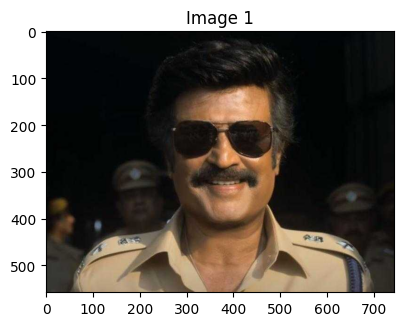

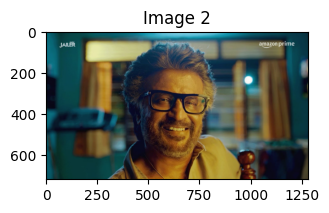

Is verified:  True , model:  VGG-Face
{'verified': True, 'distance': 1.0382587881171867, 'threshold': 1.17, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean', 'facial_areas': {'img1': {'x': 228, 'y': 111, 'w': 309, 'h': 309, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 452, 'y': 193, 'w': 374, 'h': 374, 'left_eye': None, 'right_eye': None}}, 'time': 1.24} 


Is verified:  False , model:  Facenet
{'verified': False, 'distance': 10.686615941933042, 'threshold': 10, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean', 'facial_areas': {'img1': {'x': 149, 'y': 313, 'w': 99, 'h': 99, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 452, 'y': 193, 'w': 374, 'h': 374, 'left_eye': None, 'right_eye': None}}, 'time': 2.1} 


Is verified:  False , model:  OpenFace
{'verified': False, 'distance': 0.7668209713269469, 'threshold': 0.55, 'model': 'OpenFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean', 'facia

In [ ]:
from deepface import DeepFace
import pandas as pd
path="/content/gdrive/My Drive/rajni.jpg"
img=cv2.imread(path)
path_n="/content/gdrive/My Drive/test2.jpg"
img_n=cv2.imread(path_n)
imshow("Image 1",img)
imshow("Image 2",img_n)
models = ["VGG-Face", "Facenet", "OpenFace", "DeepID", "ArcFace", "Dlib"]
for model in models:
  result  = DeepFace.verify("/content/gdrive/My Drive/rajni.jpg", "/content/gdrive/My Drive/test2.jpg", distance_metric = 'euclidean',model_name=model)
  print("Is verified: ", result["verified"],", model: ",model)
  print(result,"\n\n")

